# Homework 2

## Assignment Info
Homework #: HW2 \
Description: LMS and Linear Regression \
Course: EN.553.636 Introduction to Data Science \
Semester: Spring 2023, Homewood Campus	\
Instructor: Tamas Budavari \
TA: Matthew Tivnan \
Date: February 17, 2023 

## Student Info
Name: Amir Hossein Daraie \
JHED-ID: adaraie1 \
Email: adaraie1@jhu.edu 

In this assignment we will use data about the price of housing vs lot size

In [1]:

# import python packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 8] 

In [2]:
# Load CSV and columns
df = pd.read_csv("Housing.csv")

# extract price and lotsize columns
Y = df['price']
X = df['lotsize']

# convert to numpy arrays, specifically column vectors with shape(N,1) 
Y = np.array(Y)
X = np.array(X)
# shuffle the data
np.random.seed(0)
inds_shuffle = np.random.permutation(len(Y))
X = X[inds_shuffle]
Y = Y[inds_shuffle]

# reshape to column vectors
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(546, 1)
(546, 1)


[2pts] Create new numpy arrays (column) called X_train, X_test, Y_train, and Y_test, where the training dataset contains the first 80% of samples (rounding sample index down) and the testing dataset contains the last 20% of samples. Use print statements to print the shape of thre training and testing datasets


In [3]:
n_pnt = X.shape[0]
train_perc = 0.8
train_cnt = int(np.round(n_pnt*train_perc))
test_cnt = n_pnt - train_cnt
X_train, X_test = X[:train_cnt,:], X[train_cnt:,:]
Y_train, Y_test = Y[:train_cnt,:], Y[train_cnt:,:]

print(f'Train Size: {X_train.shape},\nTest Size: {X_test.shape}')

Train Size: (437, 1),
Test Size: (109, 1)


[2pts] Make a scatterplot of the training and testing data (Hint: plt.scatter). The x-coordinate should be the lot size, X, and the y-coordinate should be the price, Y. Use point markers with different shapes and colors to show to training and testing datasets. Include x axis labels, y axis labels, a title, and a legend.

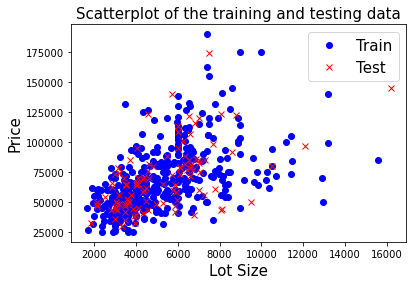

In [4]:
plt.figure()
plt.plot(X_train,Y_train,'bo')
plt.plot(X_test,Y_test,'rx')
plt.xlabel('Lot Size',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title("Scatterplot of the training and testing data",fontsize=15)
plt.legend(['Train','Test'],fontsize=15)
plt.show()

[3pts] Without using sklearn or other packages, implement least squared linear regression to fit a line to the training data using the linear model, $Y=a^T X + b$, where $a$ is a vector of weight coefficients for each feature and $b$ is a scalar offset. (Hint: Augment the data with an additional feature with constant value of ones to handle the offset, Hint: your solution should use np.linalg.inv) Use your fitted model to make a prediction about the Y_test values given X_test values. Name the predicted values of Y_test_pred_custom. Using the same fitted model, repeat the prediction for training inputs, X_train, and name that ouput Y_train_pred_custom.

In [5]:
w = None

In [6]:
if w is None:
    X_train = np.concatenate((np.ones((train_cnt,1)), X_train), axis=1)
    X_test = np.concatenate((np.ones((test_cnt,1)), X_test), axis=1)
    w = np.linalg.inv(X_train.T@X_train)@X_train.T@Y_train

# line: w0 + w1*x1 
Y_train_pred_custom = w[0]*X_train[:,0] + w[1]*X_train[:,1]
Y_test_pred_custom = w[0]*X_test[:,0] + w[1]*X_test[:,1]

print(w)

[[3.42084851e+04]
 [6.54813906e+00]]


[3pts] Use sklearn.linear_model.LinearRegression() to fit a linear model to the training data.  Use your fitted model to make a prediction about the Y_test values given X_test values. Name the predicted values of Y_test_pred_sklearn. Using the same fitted model, repeat the prediction for training inputs, X_train, and name that ouput Y_train_pred_sklearn.

[2pts] repeat the scatter plot from the previous secton but add a plot of the predicted values from the fitted models. 

[[0.         6.54813906]]


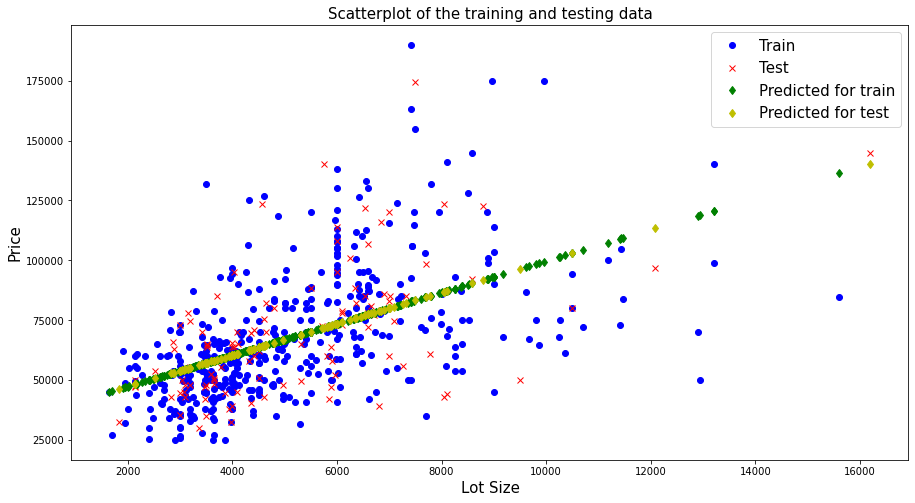

In [7]:
regression = linear_model.LinearRegression()
regression.fit(X_train,Y_train)
Y_test_pred_sklearn = regression.predict(X_test)
Y_train_pred_sklearn = regression.predict(X_train)
print(regression.coef_)

plt.figure(figsize=[15,8])
plt.plot(X_train[:,1],Y_train,'bo')
plt.plot(X_test[:,1],Y_test,'rx')
plt.plot(X_train[:,1],Y_train_pred_custom,'gd')
plt.plot(X_test[:,1],Y_test_pred_custom,'yd')
plt.xlabel('Lot Size',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title("Scatterplot of the training and testing data",fontsize=15)
plt.legend(['Train','Test',"Predicted for train","Predicted for test"],fontsize=15)
plt.show()


[2pt] Compute the residual between predicted values from the custom linear model and the actual values of Y for both the training and testing dataset using the previously computed values Y_test_pred_custom and Y_train_pred_custom. Plot two histograms for the training and testing residuals. Are the shapes roughly similar? Provide a written explanation about what the impact of over-fitting would look like in these plots. 

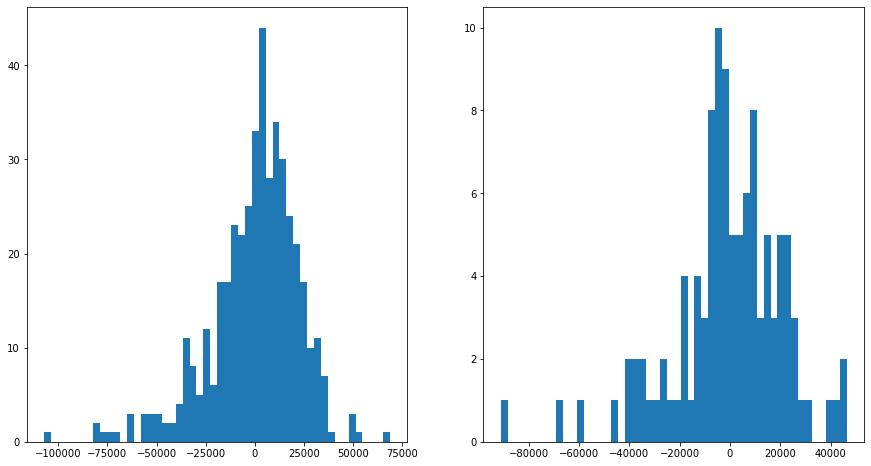

In [8]:
res_train_custom = (Y_train_pred_custom - Y_train[:,0])
res_test_custom = (Y_test_pred_custom - Y_test[:,0])
res_train_sklearn = (Y_train_pred_sklearn - Y_train)
res_test_sklearn = (Y_test_pred_sklearn - Y_test)
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
plt.hist(res_train_custom,bins=50)
plt.subplot(1,2,2)
plt.hist(res_test_custom,bins=50)
plt.show()

They look roughly similar. If there was over-training phenomena happening, then the train histogram will have the most density of numbers around zero value and highest bins are around zero. Additionally, There wouldn't be other bars away from zero. 

At the same time, the test histogram will be more spread and there will still be non-zero and medium/high bars away from zero.